In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
from fitTools.Resonator import Resonator


datapath = 'G:\\Shared drives\\Labber\\Data\\2023\\02\\Data_0228\\'
f_name = 'diss08_07A_FFLspec_sweepROpower_13'
f = h5py.File(datapath + f_name,'r')

s21 = f['Traces']['Agilent Network Analyzer - S21'][()]
numsteps = f['Traces']['Agilent Network Analyzer - S21_N'][0][()]
frange = f['Traces']['Agilent Network Analyzer - S21_t0dt'][0][()]


freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps) #two VNA values
pdrive = np.linspace(5,-5,51)
preadout = np.linspace(13,50,38)

s21_complex = (s21[:,0,:]+1j*s21[:,1,:])[:,0:15*38]
print(np.shape(s21_complex))
qvals=np.zeros(15*38)
qvalext=np.zeros(15*38)
errors=[]
for i in np.arange(15*38):
    mindex=np.argmin(np.abs(s21_complex[:,i]))
    res = Resonator(port_type='notch',f_data=freqs[mindex-100:mindex+40],z_data=s21_complex[mindex-100:mindex+40,i])
    #res = Resonator(port_type='notch',f_data=freqs,z_data=s21_complex[:,i])
    res.autofit()
    #res.show()
    qvals[i] = res.Qi
    qvalext[i] = res.Qc
    errors.append(res.errors)
    
Q_reshaped = np.reshape(qvals,[15,38])
Qext_reshaped = np.reshape(qvalext,[15,38])
#print(np.shape(qvals))
#print(s21_reshaped[1,0])





FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'G:\Shared drives\Labber\Data\2023\02\Data_0228\diss08_07A_FFLspec_powersweeps_2', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

(570,)
(15, 38)


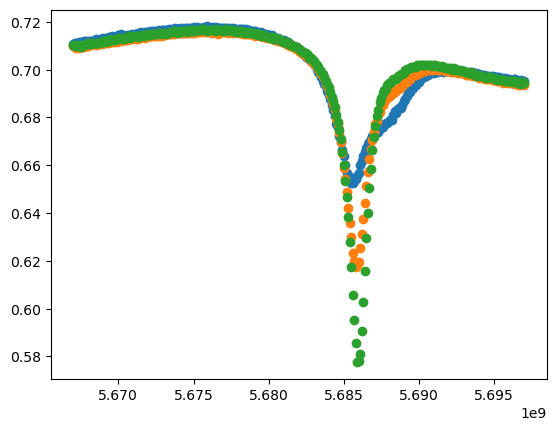

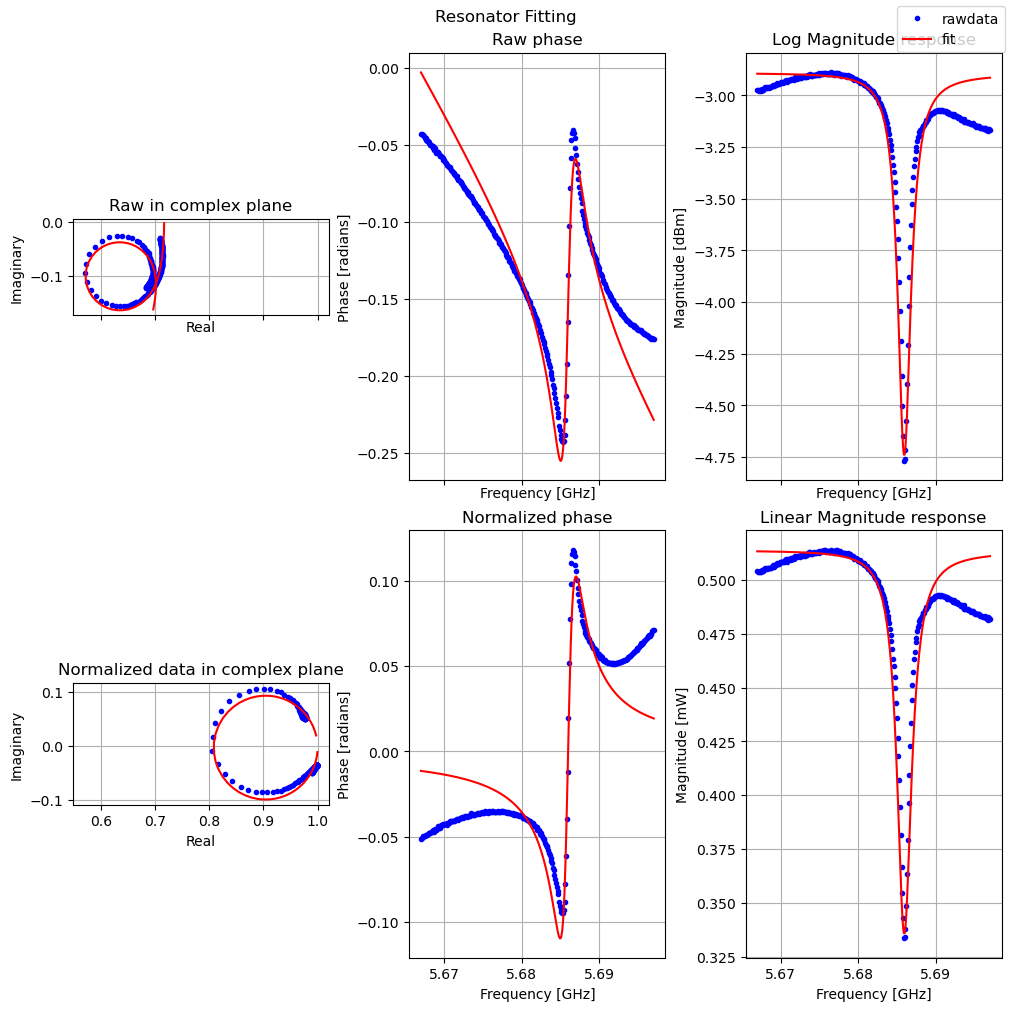

Frequency: 5.6852 GHz
Total Q: 1320
Internal Q: 1431
Coupling Q: 17078
FWHM: 4.30681 MHz
Kappa: 27.06050 MHz
Single Photon Power: -124.8 dBm
Ringdown Time: 0.051 us
Impedance Mismatch 28.317 degrees
Electrical Delay: 0.856407 ns
SNR: 1094.9


In [28]:
print(np.shape(qvals))
print(np.shape(Q_reshaped))

plt.plot(freqs,abs(s21_complex[:,94]))
plt.plot(freqs,abs(s21_complex[:,170]))
plt.plot(freqs,abs(s21_complex[:,322]))
plt.legend(['FFL power = -2dBm','FFL power = -4dBm','FFL power = -8dBm'])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('FFL Spectroscopy')
plt.show

low = s21_complex[:,322]
med = s21_complex[:,170]
high = s21_complex[:,94]

reslow = Resonator(port_type='notch',f_data=freqs,z_data=high)
reslow.autofit()
reslow.show()
print(reslow)

In [2]:
def h5_tree(val, pre=''):
    items = len(val)
    for key, val in val.items():
        items -= 1
        if items == 0:
            # the last item
            if type(val) == h5py._hl.group.Group:
                print(pre + '└── ' + key)
                h5_tree(val, pre+'    ')
            else:
                print(pre + '└── ' + key + ' (%d)' % len(val))
        else:
            if type(val) == h5py._hl.group.Group:
                print(pre + '├── ' + key)
                h5_tree(val, pre+'│   ')
            else:
                print(pre + '├── ' + key + ' (%d)' % len(val))
                
def h5_keys(val, pre=''):
    items = len(val)
    for key, val in val.items():
        print(key)
        items -= 1

In [3]:
with h5py.File(datapath + f_name, 'r') as hf:
    print(hf)
    h5_tree(hf)

<HDF5 file "diss08_07A_FFLSpectroscopy_powerSweeps_7.hdf5" (mode r)>
├── Channels (44)
├── Data
│   ├── Channel names (2)
│   ├── Data (38)
│   └── Time stamp (51)
├── Instrument config
│   ├── Agilent Network Analyzer - GPIB: 19,  at localhost
│   ├── Keithley 2400 SourceMeter - GPIB: 24, Vikram at localhost
│   ├── SignalCore SC5511A Signal Generator - , 1000334C at localhost
│   └── Vaunix Lab Brick Digital Attenuator - USB: 24679,  at localhost
├── Instruments (4)
├── Log list (1)
├── Settings
├── Step config
│   ├── 1000334C - Power
│   │   ├── Optimizer
│   │   ├── Relation parameters (1)
│   │   └── Step items (1)
│   ├── Agilent Network Analyzer - Output power
│   │   ├── Optimizer
│   │   ├── Relation parameters (1)
│   │   └── Step items (1)
│   └── Vaunix Lab Brick Digital Attenuator - Attenuation
│       ├── Optimizer
│       ├── Relation parameters (1)
│       └── Step items (1)
├── Step list (3)
├── Tags
├── Traces
│   ├── Agilent Network Analyzer - S21 (301)
│   ├── Agil

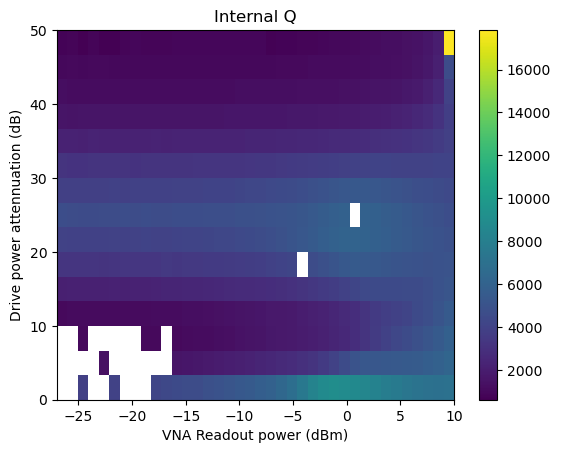

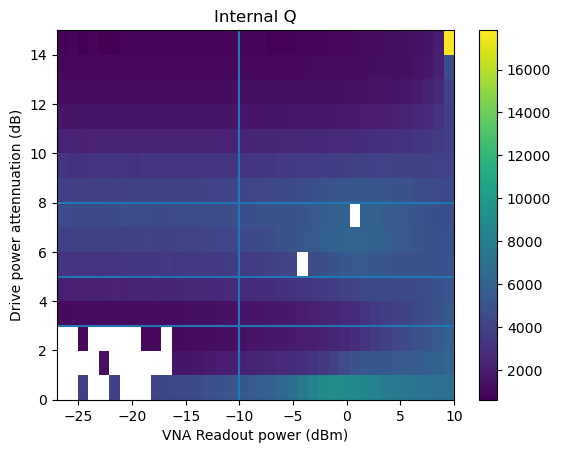

In [16]:
plt.imshow(Q_reshaped,aspect='auto',origin='lower',extent=[preadout[0],preadout[-1],pdrive[0],pdrive[-1]])
plt.colorbar()
plt.xlabel('VNA Readout power (dBm)')
plt.ylabel('Drive power attennuation (dB)')
plt.title('Internal Q')
plt.show()
plt.imshow(Q_reshaped[0:15,:],aspect='auto',origin='lower',extent=[preadout[0],preadout[-1],pdrive[0],pdrive[15]])
plt.colorbar()
plt.xlabel('VNA Readout power (dBm)')
plt.ylabel('Drive power attennuation (dB)')
plt.title('Internal Q')
plt.axvline(preadout[17])
plt.axhline(pdrive[8])
plt.axhline(pdrive[5])
plt.axhline(pdrive[3])
plt.show()

In [12]:
errors

[nan,
 nan,
 array([66999.19760545,  1168.52148737,   357.65839084]),
 nan,
 nan,
 array([61841.22075689,  1146.61874755,   377.45710934]),
 nan,
 nan,
 nan,
 array([55925.37659369,  1102.60951738,   358.80839189]),
 array([52876.18760176,  1081.97228869,   343.452628  ]),
 array([50668.86415917,  1054.91558008,   347.33016182]),
 array([47699.88415369,  1037.26461289,   343.68182371]),
 array([46032.75573869,   985.36522697,   343.67632884]),
 array([42636.36460057,   948.32451351,   330.72617917]),
 array([39164.80599999,   887.93054164,   304.38114742]),
 array([36671.83404597,   852.19537142,   300.73845823]),
 array([33789.66412798,   796.13931648,   285.31405618]),
 array([30943.31988524,   736.49659387,   275.28032072]),
 array([27285.3841355 ,   678.42612345,   249.72217908]),
 array([23767.70956299,   613.40171567,   242.28344799]),
 array([19402.71523266,   538.20418091,   193.00120673]),
 array([15422.12328183,   458.06200149,   152.05652963]),
 array([14858.66969945,   412.

In [ ]:
s2 = s21_complex[:,2]
plt.plot(freqs,s2)
plt.show
mindex=np.argmin(np.abs(s21_complex[:,2]))
res = Resonator(port_type='notch',f_data=freqs[mindex-100:mindex+20],z_data=s21_complex[mindex-100:mindex+20,2])
#res = Resonator(port_type='notch',f_data=freqs,z_data=s2)
res.autofit()
res.show()


Text(0.5, 1.0, 'Q_internal from a readout power cut (-13 dBm)')

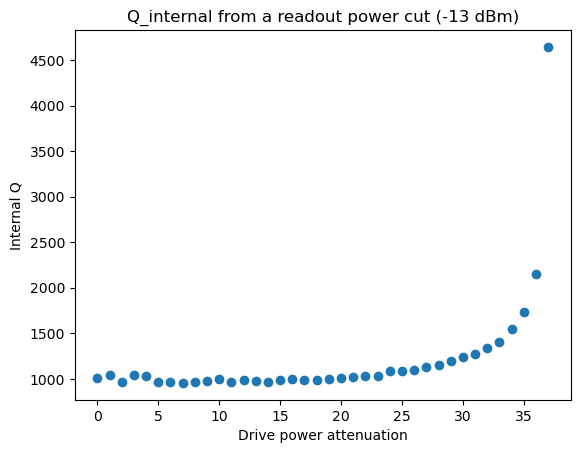

In [58]:
plt.scatter(np.arange(0,38),Q_reshaped[13,0:38])
plt.ylabel('Internal Q')
plt.xlabel('Drive power attenuation')
plt.title('Q_internal from a readout power cut (-13 dBm)')